In [1]:
# Author : Gaurab Dutta
# Email : gaurabdutta8@gmail.com
# Machine Learning model to predict Machine failure

## Machine Learning to predict Machine failure
Purpose of this project is to predict product failure for a transmission device based hardware company. Machine Learning will enable proactive service to the client and also increase the product quality. This approach is cost saving and time based preventive measure. This makes sure that tasks are performed only when warranted.

## Importing libraries

In [92]:
%load_ext jupyternotify

The jupyternotify extension is already loaded. To reload it, use:
  %reload_ext jupyternotify


In [95]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [196]:
from sklearn.utils import resample
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix, plot_confusion_matrix, f1_score, average_precision_score
from sklearn.metrics import classification_report, recall_score, precision_score, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import calibration_curve

In [3]:
# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [4]:
# Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Importing Dataset

In [6]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 102C-9CE7

 Directory of C:\Users\Gaurab\Workspace\Capstone_Project\Predictive maintenance for machines

06-03-2021  10:03    <DIR>          .
06-03-2021  10:03    <DIR>          ..
06-03-2021  09:59    <DIR>          .ipynb_checkpoints
19-02-2021  17:41         6,569,098 device_failure.csv
19-02-2021  03:10            68,459 test.csv
19-02-2021  03:10        13,992,887 train.csv
06-03-2021  10:03             2,934 Untitled.ipynb
               4 File(s)     20,633,378 bytes
               3 Dir(s)  168,014,336,000 bytes free


In [17]:
data = pd.read_csv('device_failure.csv', parse_dates=['date'])
data.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [11]:
data.shape

(124494, 11)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        124494 non-null  datetime64[ns]
 1   device      124494 non-null  object        
 2   failure     124494 non-null  int64         
 3   attribute1  124494 non-null  int64         
 4   attribute2  124494 non-null  int64         
 5   attribute3  124494 non-null  int64         
 6   attribute4  124494 non-null  int64         
 7   attribute5  124494 non-null  int64         
 8   attribute6  124494 non-null  int64         
 9   attribute7  124494 non-null  int64         
 10  attribute8  124494 non-null  int64         
 11  attribute9  124494 non-null  int64         
dtypes: datetime64[ns](1), int64(10), object(1)
memory usage: 11.4+ MB


In [19]:
data.describe()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223868e+08,159.484762,9.940455,1.741120,14.222693,260172.858025,0.292528,0.292528,12.451524
std,0.029167,7.045960e+07,2179.657730,185.747321,22.908507,15.943021,99151.009852,7.436924,7.436924,191.425623
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.127675e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227957e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833084e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000


In [20]:
data.isnull().sum()

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

In [31]:
data['device'].unique()
len(data['device'].unique())

array(['S1F01085', 'S1F013BB', 'S1F0166B', ..., 'Z1F26YZB', 'Z1F282ZV',
       'Z1F2PBHX'], dtype=object)

1168

In [32]:
# find duplicate rows
data[data.duplicated()]

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,Days


In [33]:
# find duplicate columns
data.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [50]:
# Zro Variance check
var_thres = VarianceThreshold(threshold=0.0)
var_thres.fit(data.drop(columns=['date', 'device']))

VarianceThreshold()

In [51]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [22]:
#the installation date does not have much to offer. Its just a daily datetime value for dynamic data
#adding a day column representing age (in days) from inital date of installation 
#assumption that first reading for a device is the installation date
data.sort_values(['device','date'],inplace=True)
data['Days'] = data.groupby('device')['date'].rank(method='dense')
data.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,Days
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7,1.0
1163,2015-01-02,S1F01085,0,1650864,56,0,52,6,407438,0,0,7,2.0
2326,2015-01-03,S1F01085,0,124017368,56,0,52,6,407438,0,0,7,3.0
3489,2015-01-04,S1F01085,0,128073224,56,0,52,6,407439,0,0,7,4.0
4651,2015-01-05,S1F01085,0,97393448,56,0,52,6,408114,0,0,7,5.0


In [54]:
fail = data[data.failure == 1]
fail.shape

(106, 12)

Text(0.5, 1.0, 'Distribution of Failure Rate as per age(days) from installation')

Text(0, 0.5, 'Failure')

Text(0.5, 0, 'Age(No. of days since installation)')

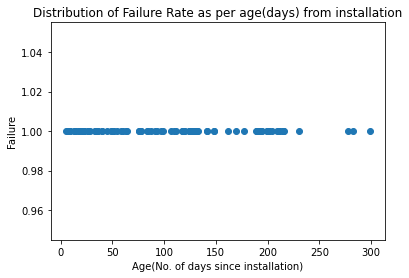

In [61]:
#Failure rate Vs days from installation 
plt.plot(fail.Days, fail.failure, 'o')
plt.title("Distribution of Failure Rate as per age(days) from installation")
plt.ylabel("Failure")
plt.xlabel("Age(No. of days since installation)")
#highly unlikely that age has any relation with failure rate

<Figure size 864x432 with 0 Axes>

<AxesSubplot:>

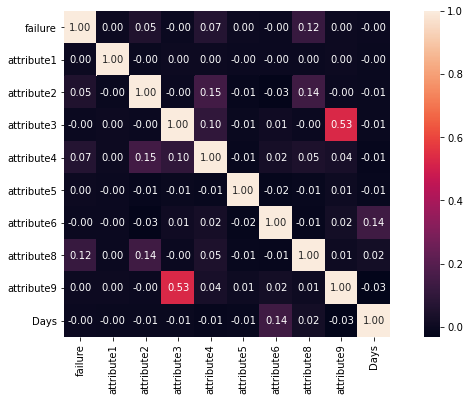

In [62]:
# Correlation check
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(), square=True, annot=True, fmt='0.2f')

attribute9 & attribute3 seem to have a good co-relation though not high enough.

attribute7 & attribute8 are excatly same, so one of them can be discarded.

In [40]:
data.drop(columns=['attribute7'], inplace=True)
data.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute8,attribute9,Days
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,7,1.0
1163,2015-01-02,S1F01085,0,1650864,56,0,52,6,407438,0,7,2.0
2326,2015-01-03,S1F01085,0,124017368,56,0,52,6,407438,0,7,3.0
3489,2015-01-04,S1F01085,0,128073224,56,0,52,6,407439,0,7,4.0
4651,2015-01-05,S1F01085,0,97393448,56,0,52,6,408114,0,7,5.0


Text(0.5, 1.0, 'Relationship between attributes')

Text(0.5, 0, 'X (Attribute9)')

Text(0, 0.5, 'Y (Attribute3)')

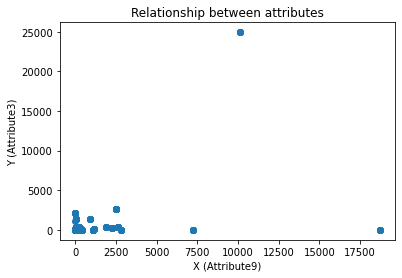

In [64]:
plt.plot(data.attribute9,data.attribute3,'o')
plt.title("Relationship between attributes")
plt.xlabel('X (Attribute9)')
plt.ylabel('Y (Attribute3)')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'Distribution of Failure according to attribute3')

Text(0.5, 0, 'Failures')

Text(0, 0.5, 'Attribute3')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'Distribution of Failure according to attribute9')

Text(0.5, 0, 'Failure')

Text(0, 0.5, 'Attribute9')

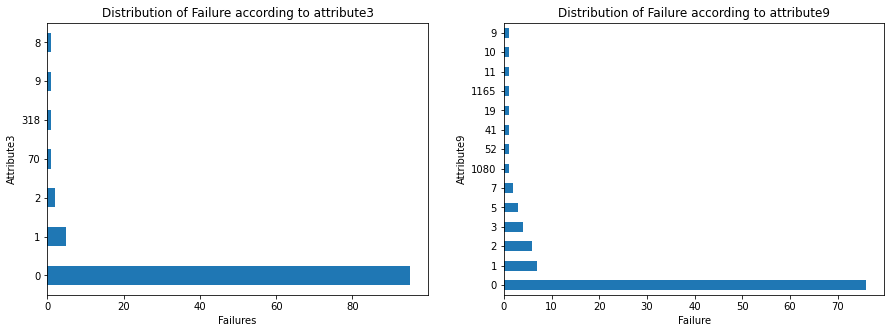

In [65]:
fig = plt.figure(figsize = (15,5))
plt.subplot2grid((1,2),(0,0))
#Failure vs Attribute3
fail.attribute3.value_counts().plot(kind='barh')
plt.title("Distribution of Failure according to attribute3")
plt.xlabel("Failures")
plt.ylabel("Attribute3")
#Failure vs Attribute9
plt.subplot2grid((1,2),(0,1))
fail.attribute9.value_counts().plot(kind='barh')
plt.title("Distribution of Failure according to attribute9")
plt.xlabel("Failure")
plt.ylabel("Attribute9")

In [16]:
data['failure'].value_counts()
# dataset is highly imbalance

0    124388
1       106
Name: failure, dtype: int64

In [75]:
#since data is highly imbalanced we would be downsampling data.
df_nonfailure = data[data['failure'] == 0]
df_failure = data[data['failure']==1]

df_nonfailure_downsample = resample(df_nonfailure, replace=False,n_samples = 106, random_state=23)
df_resampled = pd.concat([df_nonfailure_downsample,df_failure])
df_resampled.shape

(212, 12)

In [76]:
#dropping unwanted columns
data_Outcome = df_resampled['failure']
df_resampled = df_resampled.drop(['failure','date','device'],axis = 1)
df_resampled.head()

,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute8,attribute9,Days
164,26328712,0,0,9,8,185511,0,1,1.0
15410,217595120,0,0,6,6,192727,0,0,18.0
73407,233671064,0,0,0,6,19160,0,0,63.0
81783,117101616,0,0,0,8,224695,0,0,135.0
13644,226193536,0,0,0,13,261109,0,0,16.0


In [77]:
# Standardization
scaler = StandardScaler()
x_std = scaler.fit_transform(df_resampled)
data_scaled = pd.DataFrame(x_std)
data_scaled.head()

,0,1,2,3,4,5,6,7,8
0,-1.402011,-0.224912,-0.156009,-0.138593,-0.426639,-0.682402,-0.184945,-0.110005,-1.279188
1,1.308490,-0.224912,-0.156009,-0.160191,-0.545336,-0.612099,-0.184945,-0.119183,-1.055891
2,1.536308,-0.224912,-0.156009,-0.203389,-0.545336,-2.303108,-0.184945,-0.119183,-0.464810
3,-0.115637,-0.224912,-0.156009,-0.203389,-0.426639,-0.300645,-0.184945,-0.119183,0.480919
4,1.430342,-0.224912,-0.156009,-0.203389,-0.129895,0.054125,-0.184945,-0.119183,-1.082161


In [78]:
data_scaled.describe()

,0,1,2,3,4,5,6,7,8
count,2.120000e+02,2.120000e+02,2.120000e+02,2.120000e+02,2.120000e+02,2.120000e+02,2.120000e+02,2.120000e+02,2.120000e+02
mean,1.110223e-16,-2.729735e-16,-1.309225e-19,1.751743e-16,-2.827927e-17,-1.697411e-16,1.303988e-16,-1.445385e-16,-1.277804e-16
std,1.002367e+00,1.002367e+00,1.002367e+00,1.002367e+00,1.002367e+00,1.002367e+00,1.002367e+00,1.002367e+00,1.002367e+00
min,-1.763217e+00,-2.249119e-01,-1.560086e-01,-2.033892e-01,-7.827312e-01,-2.489554e+00,-1.849453e-01,-1.191826e-01,-1.279188e+00
25%,-8.137589e-01,-2.249119e-01,-1.560086e-01,-2.033892e-01,-4.266389e-01,-3.286357e-01,-1.849453e-01,-1.191826e-01,-8.818504e-01
50%,6.279710e-02,-2.249119e-01,-1.560086e-01,-2.033892e-01,-3.079415e-01,6.523675e-02,-1.849453e-01,-1.191826e-01,-2.612156e-01
75%,8.547482e-01,-2.246955e-01,-1.560086e-01,-1.601915e-01,-1.298953e-01,5.312513e-01,-1.849453e-01,-1.191826e-01,6.516759e-01
max,1.683226e+00,6.786972e+00,8.817945e+00,1.179117e+01,4.736700e+00,3.108360e+00,9.748489e+00,1.057305e+01,2.635080e+00


In [108]:
# split data into test and train
x_train, x_test, y_train, y_test = train_test_split(data_scaled, data_Outcome, test_size = 0.25, \
                                                random_state = 19)

In [83]:
from lazypredict.Supervised import LazyRegressor
%reload_ext jupyternotify

<IPython.core.display.Javascript object>

In [86]:
# Finding the best model using Auto-ML
# %%notify
lreg = LazyRegressor()
models, predictions = lreg.fit(xtrain, xtest, ytrain, ytest)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 43/43 [00:02<00:00, 15.77it/s]


,R-Squared,RMSE,Time Taken
Model,,,
ExtraTreesRegressor,0.50,0.35,0.15
RandomForestRegressor,0.49,0.36,0.22
BaggingRegressor,0.46,0.36,0.05
GradientBoostingRegressor,0.45,0.37,0.08
XGBRegressor,0.43,0.37,0.21
LGBMRegressor,0.42,0.38,0.08
HistGradientBoostingRegressor,0.41,0.38,0.27
AdaBoostRegressor,0.29,0.42,0.14
DecisionTreeRegressor,0.09,0.48,0.02


In [137]:
def plot_cm(cm_array):
    plt.figure(figsize=(8,4))
    cm_df = pd.DataFrame(cm_array)
    sns.heatmap(cm_df, square=True, annot=True, fmt='d')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title('Actual vs. Predicted Confusion Matrix')
    plt.show()

In [165]:
def plot_auc(roc_auc, fpr, tpr):
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, color='green', lw=2, label='AUC = %0.2f' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Area Under Curve')
    plt.legend(loc="lower right")
    plt.show()

In [190]:
def plot_precision_recall_curve(pred):
    average_precision = average_precision_score(y_test, pred)  
    precision, recall, _ = precision_recall_curve(y_test, pred)
    plt.step(recall, precision, color='b', alpha = 0.2, where = 'post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AUC={0:0.2f}'.format(average_precision))

In [174]:
def performance_metrices(model):
    training_score = model.score(x_train, y_train)
    testing_score = model.score(x_test, y_test)
    accuracy = model.score(x_test, y_test)
    error_rate = 1 - accuracy
    pred = model.predict(x_test)
    prob = model.predict_proba(x_test)
    prob = prob[:, 1]
    cm_array = confusion_matrix(y_test, pred)
    fpr, tpr, th = roc_curve(y_test, prob)
    roc_auc = auc(fpr, tpr)
    recall = recall_score(y_test, pred)
    precision = precision_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    average_precision = average_precision_score(y_test, pred)

    print('Training Score: ', training_score*100, '%')
    print('Testing Score: ', testing_score*100, '%')
    print('Model Accuracy: ', accuracy*100, '%')
    print('Error Rate: ', error_rate*100, '%')
    print('ROC_AUC score: ', roc_auc*100, '%')
    print('Recall score: ', recall*100, '%')
    print('Precision score: ', precision*100, '%')
    print('F1 score: ', f1*100, '%')
    print('Average Precision score: ', average_precision*100, '%')
    print('\n')
    print('Classification report: \n', classification_report(pred, y_test))
#     print('Predictions: ', pred)
#     print('Predictions Probability: ', prob)
#     print('Confusion Matrix: \n', cm_array)
#     plot_confusion_matrix(model, x_test, y_test, cmap=plt.cm.Blues)
    plot_cm(cm_array)
    plot_auc(roc_auc, fpr, tpr)
#     plot_precision_recall_curve(pred)
    precision, recall, _ = precision_recall_curve(y_test, pred)
    plt.step(recall, precision, color='b', alpha = 0.2, where = 'post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AUC={0:0.2f}'.format(average_precision))

In [153]:
# Random Forest Classifier
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [91]:
print('Training Score: ', model_rf.score(x_train, y_train)*100, '%')
print('Testing Score: ', model_rf.score(x_test, y_test)*100, '%')

Training Score:  100.0 %
Testing Score:  84.90566037735849 %


In [100]:
# Hyper-Parameter Optimization using GridSearchCV
# %%notify
np.random.seed(42)
start = time.time()

param_dist = {'n_estimators': [10, 20, 30, 40, 50, 60, 80, 100],
              'max_depth': [2, 4, 6, 8, 12, 10, 20],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(model_rf, cv = 10,
                     param_grid = param_dist,
                     n_jobs=-1,
                     scoring='roc_auc')

cv_rf.fit(x_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 12, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 80, 100]},
             scoring='roc_auc')

Best Parameters using grid search: 
 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 80}
Time taken in grid search:  398.87


In [101]:
cv_rf.best_estimator_

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=4,
                       n_estimators=80, random_state=42)

In [192]:
model_rf.set_params(bootstrap=False, 
                    criterion='entropy', 
                    max_depth=4,
                    max_features='auto',
                    n_estimators=80, 
                    random_state=42)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=4,
                       n_estimators=80, random_state=42)

In [193]:
# Retraining the model
model_rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=4,
                       n_estimators=80, random_state=42)

In [194]:
print('Training Score: ', model_rf.score(x_train, y_train)*100, '%')
print('Testing Score: ', model_rf.score(x_test, y_test)*100, '%')

Training Score:  88.67924528301887 %
Testing Score:  84.90566037735849 %


In [107]:
model_rf.feature_importances_

array([0.03940399, 0.2564047 , 0.00066855, 0.29808539, 0.05254159,
       0.09336224, 0.16881124, 0.00899559, 0.08172669])

Training Score:  100.0 %
Testing Score:  84.90566037735849 %
Model Accuracy:  84.90566037735849 %
Error Rate:  15.094339622641506 %
ROC_AUC score:  89.72701149425288 %
Recall score:  86.20689655172413 %
Precision score:  86.20689655172413 %
F1 score:  86.20689655172413 %
Average Precision score:  81.86345994211742 %


Classification report: 
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        24
           1       0.86      0.86      0.86        29

    accuracy                           0.85        53
   macro avg       0.85      0.85      0.85        53
weighted avg       0.85      0.85      0.85        53



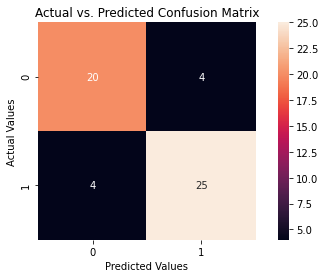

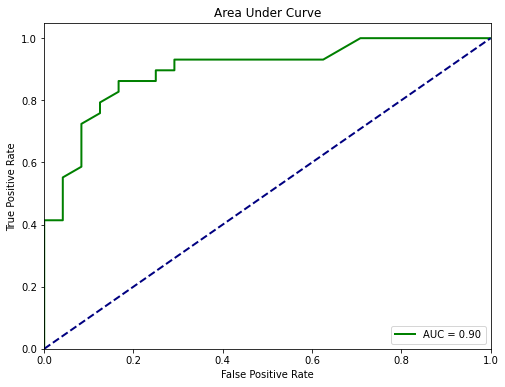

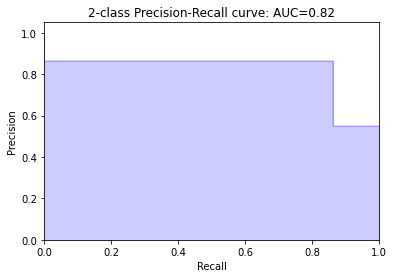

In [175]:
performance_metrices(model_rf)

In [130]:
#decision tree classifier
model_dt = DecisionTreeClassifier(random_state=12)
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=12)

In [131]:
print('Training Score: ', model_dt.score(x_train, y_train)*100, '%')
print('Testing Score: ', model_dt.score(x_test, y_test)*100, '%')

Training Score:  100.0 %
Testing Score:  81.13207547169812 %


Training Score:  100.0 %
Testing Score:  81.13207547169812 %
Model Accuracy:  81.13207547169812 %
Error Rate:  18.867924528301884 %
ROC_AUC score:  81.68103448275862 %
Recall score:  75.86206896551724 %
Precision score:  88.0 %
F1 score:  81.48148148148148 %
Average Precision score:  79.96616785946648 %


Classification report: 
               precision    recall  f1-score   support

           0       0.88      0.75      0.81        28
           1       0.76      0.88      0.81        25

    accuracy                           0.81        53
   macro avg       0.82      0.81      0.81        53
weighted avg       0.82      0.81      0.81        53



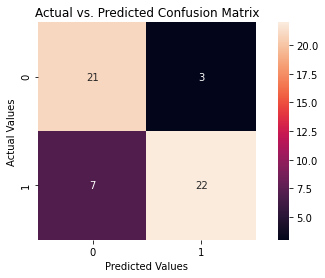

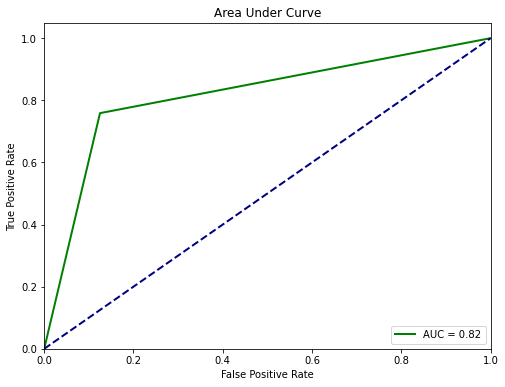

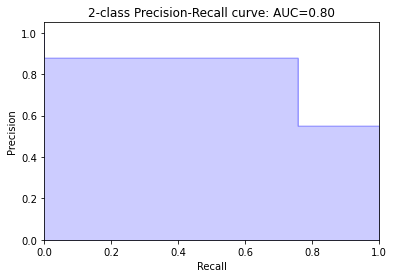

In [176]:
performance_metrices(model_dt)

In [178]:
# gaussian naive bayes
model_gnb = GaussianNB()
model_gnb.fit(x_train,y_train)

GaussianNB()

In [179]:
print('Training Score: ', model_gnb.score(x_train, y_train)*100, '%')
print('Testing Score: ', model_gnb.score(x_test, y_test)*100, '%')

Training Score:  69.81132075471697 %
Testing Score:  77.35849056603774 %


Training Score:  69.81132075471697 %
Testing Score:  77.35849056603774 %
Model Accuracy:  77.35849056603774 %
Error Rate:  22.64150943396226 %
ROC_AUC score:  88.79310344827586 %
Recall score:  58.620689655172406 %
Precision score:  100.0 %
F1 score:  73.91304347826086 %
Average Precision score:  81.26219908913468 %


Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.67      0.80        36
           1       0.59      1.00      0.74        17

    accuracy                           0.77        53
   macro avg       0.79      0.83      0.77        53
weighted avg       0.87      0.77      0.78        53



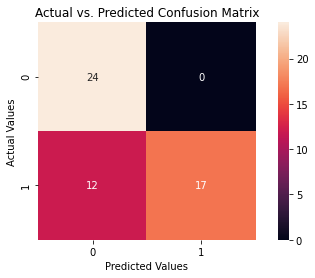

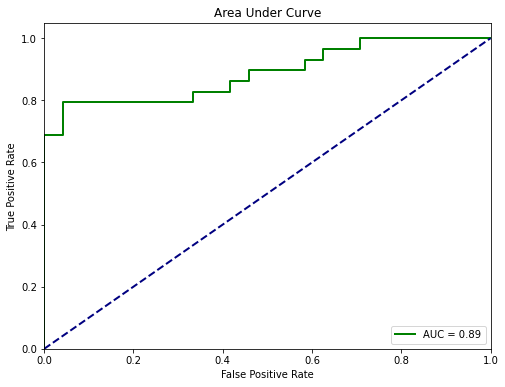

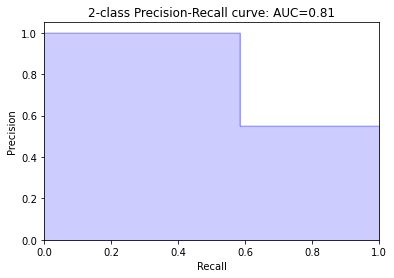

In [180]:
performance_metrices(model_gnb)

In [182]:
model_svc = SVC(kernel='linear')
model_svc.fit(x_train,y_train)

SVC(kernel='linear')

In [183]:
print('Training Score: ', model_svc.score(x_train, y_train)*100, '%')
print('Testing Score: ', model_svc.score(x_test, y_test)*100, '%')

Training Score:  67.9245283018868 %
Testing Score:  66.0377358490566 %


In [188]:
pred_svc = model_svc.predict(x_test)
print(classification_report(pred_svc, y_test))

              precision    recall  f1-score   support

           0       1.00      0.57      0.73        42
           1       0.38      1.00      0.55        11

    accuracy                           0.66        53
   macro avg       0.69      0.79      0.64        53
weighted avg       0.87      0.66      0.69        53



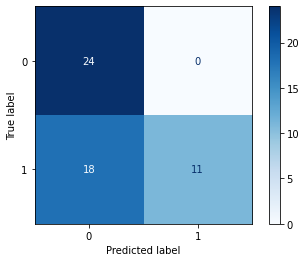

In [189]:
plot_confusion_matrix(model_svc, x_test, y_test, cmap=plt.cm.Blues)

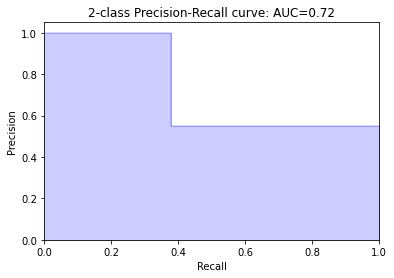

In [191]:
plot_precision_recall_curve(pred_svc)

In [197]:
def model_comparison(X_train, X_test, y_train,y_test):
    lr = LogisticRegression()
    gnb = GaussianNB()
    svc = LinearSVC(C=1.0)
    rfc = RandomForestClassifier(max_depth=4, n_estimators=80)
    
    plt.figure(figsize=(10, 10))
    ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    ax2 = plt.subplot2grid((3, 1), (2, 0))
    
    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    
    for clf, name in [(lr, 'Logistic'),\
                      (gnb, 'Naive Bayes'),\
                      (svc, 'Support Vector Classification'),\
                      (rfc, 'Random Forest')]:
        clf.fit(X_train, y_train)
        
        if hasattr(clf, "predict_proba"):
            prob_pos = clf.predict_proba(X_test)[:, 1]
        else:  # use decision function
            prob_pos = clf.decision_function(X_test)
            prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
        
        fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=10)
    
        ax1.plot(mean_predicted_value, fraction_of_positives, "s-", label="%s" % (name, ))
        ax2.hist(prob_pos, range=(0, 1), bins=10, label=name, histtype="step", lw=2)
    
    ax1.set_ylabel("Fraction of positives")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend(loc="lower right")
    ax1.set_title('Calibration plots  (reliability curve)')
    
    ax2.set_xlabel("Mean predicted value")
    ax2.set_ylabel("Count")
    ax2.legend(loc="upper center", ncol=2)
    
    plt.tight_layout()
    plt.show()

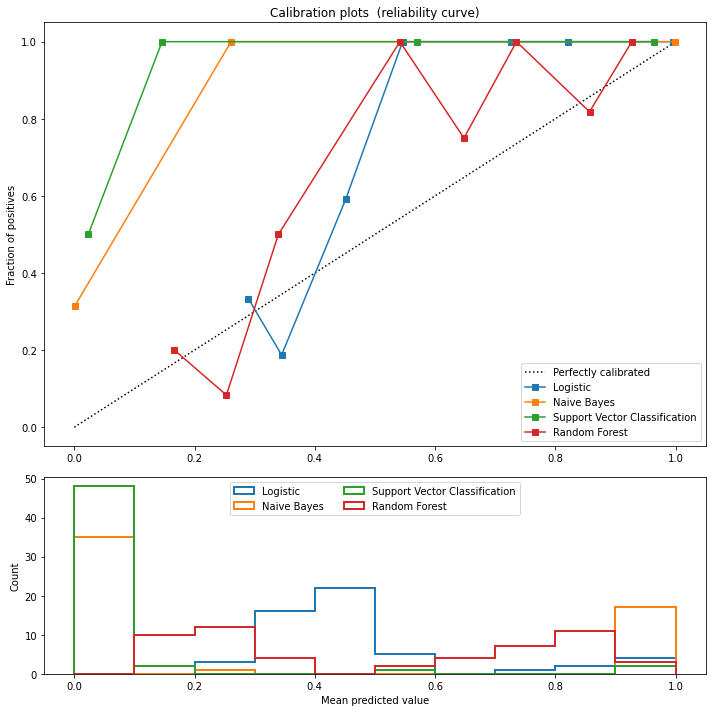

In [198]:
model_comparison(x_train, x_test, y_train, y_test)